In [3]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from imutils import build_montages
from imutils import paths
import random
import cv2

In [15]:
Data = pd.read_csv(r"G:\PYTHON\FinalYr_Phase-2\Meta_data_1.csv")

In [16]:
Data.head()

,Unnamed: 0,path,value
0,0,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-0.png,0
1,1,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-1.png,0
2,2,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-10.png,0
3,3,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-100.png,0
4,4,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-101.png,0


In [17]:
Data.drop(Data.columns[0], axis=1, inplace=True)

In [18]:
Data.head()

,path,value
0,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-0.png,0
1,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-1.png,0
2,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-10.png,0
3,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-100.png,0
4,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-101.png,0


In [19]:
Data['split'] = np.random.randn(Data.shape[0], 1)

msk = np.random.rand(len(Data)) <= 0.8

train = Data[msk]
test = Data[~msk]

In [20]:
print(train.value.value_counts())
print(test.value.value_counts())

0    100
1     76
Name: value, dtype: int64
1    24
0    20
Name: value, dtype: int64


In [21]:
train.reset_index(inplace=True)

In [22]:
train.drop(train.columns[0], axis=1, inplace=True)
train.head()

C:\Users\Bhanu\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,path,value,split
0,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-0.png,0,-1.082360
1,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-1.png,0,0.444722
2,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-100.png,0,0.971805
3,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-102.png,0,0.679308
4,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-103.png,0,0.203379


In [23]:
data = []
image_size = 224
test_pixel_data = []
import matplotlib.pyplot as plt
from PIL import Image


for i in range(len(train)):
    img_array = Image.open(train['path'][i])
    new_img_array = np.array(img_array)
    if new_img_array.ndim == 2:
        new_img_array = cv2.cvtColor(new_img_array, cv2.COLOR_GRAY2BGR)
    new_img_array = cv2.resize(new_img_array,(224,224))
    #print(i,np.array(new_img_array).shape,train['value'][i])
    data.append([new_img_array, train['value'][i]])


In [24]:
test.reset_index(inplace=True)

In [25]:
test.drop(test.columns[0], axis=1, inplace=True)
test.head()

C:\Users\Bhanu\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,path,value,split
0,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-10.png,0,1.203128
1,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-101.png,0,0.001373
2,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-105.png,0,-0.170708
3,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-108.png,0,0.988919
4,G:\PYTHON\FinalYr_Phase-2\Cl2\Chest\Chest-110.png,0,0.239526


In [26]:
for i in range(len(test)):
    img_array = Image.open(test['path'][i])
    new_img_array = np.array(img_array)
    if new_img_array.ndim == 2:
        new_img_array = cv2.cvtColor(new_img_array, cv2.COLOR_GRAY2BGR)
    new_img_array = cv2.resize(new_img_array,(224,224))
    test_pixel_data.append(new_img_array)

In [27]:
np.random.shuffle(data)
x = []
y = []

counter = 406
count = 0

for image in data:
    try:
        x.append(image[0])
        y.append(image[1])
    except:
        print(count)
    count += 1

# converting x & y to numpy array as they are list
x = np.array(x)
y = np.array(y)

In [28]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([100,  76], dtype=int64))

In [29]:
pd.Series(y).value_counts()

0    100
1     76
dtype: int64

In [30]:
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state = 42,stratify=y)

In [31]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [32]:
test_pixel_data = np.array(test_pixel_data)

test_pixel_data = test_pixel_data/255

print(X_train.shape,X_val.shape,test_pixel_data.shape)

(140, 224, 224, 3) (36, 224, 224, 3) (44, 224, 224, 3)


In [95]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   data_format='channels_last',
                                   brightness_range=[0.5, 1.5],
                                   featurewise_center=True,
                                   featurewise_std_normalization=True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow(X_train,y_train,batch_size=8,shuffle=True)

val_generator = val_datagen.flow(X_val,y_val,batch_size=8)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   data_format='channels_last',
                                   brightness_range=[0.5, 1.5],
                                   featurewise_center=True,
                                   featurewise_std_normalization=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


In [96]:
print(X_train.shape,y_train.shape,X_val.shape)

(140, 224, 224, 3) (140, 2) (36, 224, 224, 3)


In [97]:
from tensorflow.keras.applications import MobileNetV2
from keras.layers import *
from keras.models import Sequential
from keras.regularizers import *
from tensorflow.keras.optimizers import Adam

In [152]:
def build_model():
    model = Sequential()

    conv_base = MobileNetV2(input_shape=(224,224,3), include_top=False, pooling='max',weights='imagenet')
    model.add(conv_base)
    model.add(BatchNormalization())
    model.add(Dense(224, activation='relu', kernel_regularizer=l1_l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(0.01)))
  # model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
  # model.add(BatchNormalization())
  # model.add(Dense(1024, activation='relu', kernel_regularizer=l1_l2(0.01)))
  # model.add(BatchNormalization())
    model.add(Dense(2, activation='softmax'))
    for layer in model.layers:
        layer.trainable = True
 
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy',"Precision","Recall"])

    return model

In [70]:
cbs = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=3, min_lr=1e-5, verbose=0),
tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-6, patience=10, verbose=1, mode='auto')]

In [153]:
model = build_model()
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
batch_normalization_31 (Batc (None, 1280)              5120      
_________________________________________________________________
dense_44 (Dense)             (None, 224)               286944    
_________________________________________________________________
batch_normalization_32 (Batc (None, 224)               896       
_________________________________________________________________
dense_45 (Dense)             (None, 128)               28800     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 64)              

C:\Users\Bhanu\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [107]:
from tensorflow.python.keras.callbacks import TensorBoard
from time import time
Tensorboard = TensorBoard(log_dir="G:\PYTHON\FinalYr_Phase-2\logs\{}".format(time()))

In [154]:
%%timeit -n1 -r1 
with tf.device("GPU"):
    model.fit(train_generator,steps_per_epoch=87,epochs=100,validation_data=val_generator,validation_steps=22,callbacks=[cbs])

C:\Users\Bhanu\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Bhanu\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
87/87 [==============================] - 23s 189ms/step - loss: 121.6700 - accuracy: 0.5214 - precision: 0.5214 - recall: 0.5214 - val_loss: 119.2280 - val_accuracy: 0.9444 - val_precision: 0.9444 - val_recall: 0.9444
22.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


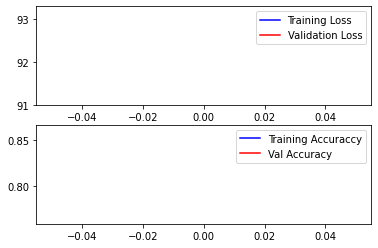

In [112]:
fig, ax  = plt.subplots(2,1)

#Loss
ax[0].plot(model.history.history['loss'], color = 'b', label='Training Loss')
ax[0].plot(model.history.history['val_loss'], color = 'r', label='Validation Loss')
ax[0].legend()
#Accuracy
ax[1].plot(model.history.history['accuracy'], color='b', label='Training Accuraccy')
ax[1].plot(model.history.history['val_accuracy'], color='r', label='Val Accuracy')
ax[1].legend()

In [30]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [155]:
pred = model.predict(X_val/255)
predictions = np.argmax(pred,axis=1)
test_evaluation = model.evaluate(val_generator)

5/5 [==============================] - 1s 129ms/step - loss: 119.2280 - accuracy: 0.9444 - precision: 0.9444 - recall: 0.9444


In [74]:
train_evaluation = model.evaluate(train_generator)

18/18 [==============================] - 3s 144ms/step - loss: 529.9676 - accuracy: 0.6857 - precision: 0.6857 - recall: 0.6857


In [158]:
model.save("G:\\PYTHON\\FinalYr_Phase-2\\weights\\VGG16_CL.h5")

C:\Users\Bhanu\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [156]:
Y_VAL = np.array(list(pd.DataFrame(y_val).idxmax(axis=1)))

In [157]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_VAL,predictions))
print(classification_report(Y_VAL,predictions,digits=3))

[[20  0]
 [ 2 14]]
              precision    recall  f1-score   support

           0      0.909     1.000     0.952        20
           1      1.000     0.875     0.933        16

    accuracy                          0.944        36
   macro avg      0.955     0.938     0.943        36
weighted avg      0.949     0.944     0.944        36



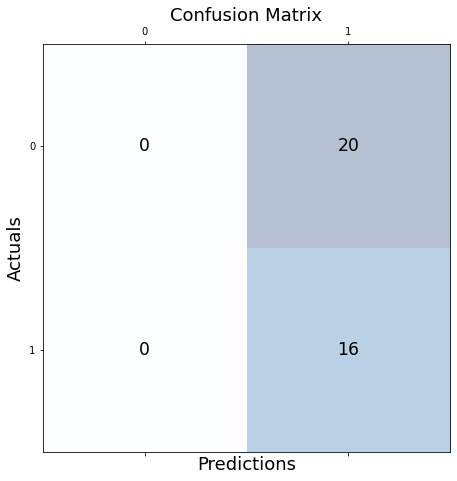

In [56]:
conf_matrix = confusion_matrix(Y_VAL,predictions)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1]:
from keras.models import load_model
model = load_model("G:\\PYTHON\\FinalYr_Phase-2\\weights\\VGG16_CL.h5")

In [7]:
%matplotlib inline
# get sample image to test.
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

img_covid = 'G:\\PYTHON\\Final_year_project\\Final\\covid_image_data\\covid_image_data\\Images\\COVID\\COVID-3.png'
img_normal = 'G:\\PYTHON\\FinalYr_Phase-2\\Normal\\Normal-99.png'
img_test = 'C:\\Users\\Bhanu\\Downloads\\sad.jpeg'

img_array = Image.open(img_test)
new_img_array = np.array(img_array)
if new_img_array.ndim == 2:
    new_img_array = cv2.cvtColor(new_img_array, cv2.COLOR_GRAY2BGR)
new_img_array = cv2.resize(new_img_array,(224,224))




dt = []
dt.append(new_img_array)
X = np.array(dt)
X = X/255
val = model.predict(X)
print("Prediction :",np.argmax(val,axis=1))

Prediction : [0]


In [10]:
np.argmax(val,axis=1)[0]

0